In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [39]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [4]:
# VGG16 is a popular deep convolutional neural network architecture used in computer vision.
# Developed by the Visual Geometry Group at the University of Oxford, it is named after its 16 weight layers.

# Key characteristics of VGG16 include:
# 1. Depth: VGG16 comprises 16 layers, making it a deep network with 13 convolutional layers and 3 fully connected layers.
# 2. Small Convolutional Kernels: It uses 3x3 convolutional kernels, which are effective for capturing local features.
# 3. Max-Pooling Layers: VGG16 incorporates max-pooling layers after each pair of convolutional layers for downsampling.
# 4. Fully Connected Layers: The last three layers are fully connected, providing class probabilities for classification tasks.
# 5. ReLU Activation: Rectified Linear Unit (ReLU) activation functions introduce non-linearity.
# 6. Dropout: Dropout layers are used to reduce overfitting during training.

# VGG16 was highly successful in image classification, particularly in the 2014 ImageNet Challenge.
# It is still used in various computer vision applications, such as transfer learning, object recognition, and feature extraction.
# However, its depth and parameter count make it resource-intensive in terms of computational and memory requirements.


### 1. Importing Required libraries

In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

### 2. Import the train and test datasets

In [7]:
# Define the directory path for the training data.
train_dir = "/content/gdrive/MyDrive/Covid_19 Classification/Covid19-dataset/train/"

# Define the directory path for the testing data.
test_dir = "/content/gdrive/MyDrive/Covid_19 Classification/Covid19-dataset/test/"


In [8]:
# Define the categories (classes) your model will classify data into.
categories = ['Covid', 'Normal', 'Viral Pneumonia']

# Initialize empty lists for storing your data and labels.
y = []  # Combined labels
x = []  # Combined data

# Set the batch size for training your model. Batch size determines how many data samples are processed in each iteration.
Batch_Size = 32

# Set the initial learning rate for your model. Learning rate affects the step size in training algorithms.
INIT_LR = 1e-4

# Define the number of epochs. An epoch is one complete pass through the entire training dataset.
EPOCHES = 10


### 3. Reading Images from the dataset

#### 3.1 Reading The Images From The Train Dataset and Preprocessing

In [9]:
# Import the OpenCV library.
import cv2

# Read an image from the specified file path.
im = cv2.imread('/content/gdrive/MyDrive/Covid_19 Classification/Covid19-dataset/train/Covid/COVID-00013b.jpg')

# Get the dimensions of the image: width (w), height (h), and number of color channels (c).
h, w, c = im.shape

# Print the width of the image.
print(w)

# Print the height of the image.
print(h)

# Print the number of color channels (e.g., 3 for RGB images).
print(c)


1806
1375
3


In [10]:
# Loop through the defined categories (e.g., 'Covid', 'Normal', 'Viral Pneumonia').
for category in categories:
    # Create the full path to the directory for the current category within the training directory.
    path = os.path.join(train_dir, category)

    # Iterate through the files in the current category directory.
    for img in os.listdir(path):
        # Create the full path to the current image file.
        img_path = os.path.join(path, img)

        # Read the image using OpenCV.
        image = cv2.imread(img_path)

        # Resize the image to a common size (e.g., 500x500 pixels).
        image = cv2.resize(image, (500, 500))

        # Normalize the image pixel values to be in the range [0, 1].
        image = image / 255.0

        # Append the preprocessed image to the data list (x).
        x.append(image)

        # Append the corresponding category label to the labels list (y).
        y.append(category)

In [16]:
x[0]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [17]:
y[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

#### 3.1. Reading The Images From The Test Dataset and Preprocessing

In [11]:
# Loop through the defined categories (e.g., 'Covid', 'Normal', 'Viral Pneumonia').
for category in categories:
    # Create the full path to the directory for the current category within the testing directory.
    path = os.path.join(test_dir, category)

    # Iterate through the files in the current category directory.
    for img in os.listdir(path):
        # Create the full path to the current image file.
        img_path = os.path.join(path, img)

        # Read the image using OpenCV.
        image = cv2.imread(img_path)

        # Resize the image to a common size (e.g., 500x500 pixels).
        image = cv2.resize(image, (500, 500))

        # Normalize the image pixel values to be in the range [0, 1].
        image = image / 255.0

        # Append the preprocessed image to the data list (x).
        x.append(image)

        # Append the corresponding category label to the labels list (y).
        y.append(category)

In [12]:
x[0]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [13]:
y[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

### 4. Preprocessing The Data And Label

In [14]:
# Import the train_test_split function from scikit-learn to split the data.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets:
# - x is the data (images).
# - y is the labels (categories).
# - test_size specifies the proportion of the data to be used for testing (e.g., 20%).
# - random_state is used for reproducibility of the split.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# After this code, you'll have:
# - x_train: Training data (images).
# - x_test: Testing data (images).
# - y_train: Training labels (categories).
# - y_test: Testing labels (categories).

In [15]:
# perform one-hot encoding on the class labels. 
# One-hot encoding is a common technique used in machine learning for handling categorical labels. 
# It transforms categorical labels into a binary format that is suitable for use in machine learning models.

# Initialize a LabelBinarizer object.
lb = LabelBinarizer()

# Fit and transform the training labels (y_train) to one-hot encoded format.
y_train = lb.fit_transform(y_train)

# Transform the testing labels (y_test) to one-hot encoded format using the same LabelBinarizer.
y_test = lb.transform(y_test)

# After this code, y_train and y_test will be one-hot encoded, where each category is represented as a binary vector.

In [16]:
#### convert your data and labels to NumPy arrays and specifying the data type as 'float32'.
#### This data type is often used in machine learning for numerical computations and is more memory-efficient compared to other data types like 'float64'

x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')

In [23]:
x_train.shape

(253, 500, 500, 3)

In [24]:
y_train.shape

(253, 3)

In [25]:
x_test.shape

(64, 500, 500, 3)

In [26]:
y_test.shape

(64, 3)

### 5. Bulding A VGG16 Model

In [24]:
#### Using VGG16

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new classification head
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)  # Adjust the number of units for your task (3 for your case)

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 250, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 250, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 250, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 125, 128)     0     

### 6. Train the model

In [27]:
# Train the model with your data
model.fit(x_train, y_train, epochs=EPOCHES, batch_size=Batch_Size, validation_data=(x_test, y_test))

# After training, you can evaluate the model and save it
evaluation = model.evaluate(x_test, y_test, batch_size=Batch_Size)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Save the model
model.save("Covid_VGG16.h5")

Epoch 1/10
8/8 [==============================] - 8s 957ms/step - loss: 0.2823 - accuracy: 0.8933 - val_loss: 0.0617 - val_accuracy: 0.9844
Epoch 2/10
8/8 [==============================] - 7s 956ms/step - loss: 0.2471 - accuracy: 0.9130 - val_loss: 0.0527 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 8s 992ms/step - loss: 0.2999 - accuracy: 0.8814 - val_loss: 0.0424 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.2248 - accuracy: 0.9328 - val_loss: 0.0486 - val_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.2815 - accuracy: 0.9091 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.2691 - accuracy: 0.9249 - val_loss: 0.0606 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 8s 975ms/step - loss: 0.2290 - accuracy: 0.9289 - val_loss: 0.1037 - val_accuracy: 0.9531
Epoch 8/10
8/8 [=============

### 7. Evaluate the model using new images

In [28]:
# Preprocess the new image
new_image_path = '/content/gdrive/MyDrive/Covid_19 Classification/Covid19-dataset/train/Covid/COVID-00013b.jpg'  # Replace with the path to your new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (500, 500))
new_image = new_image / 255  # Normalize pixel values

# Expand dimensions to match the model's input shape
new_image = np.expand_dims(new_image, axis=0)

# Use the model to make predictions
predictions = model.predict(new_image)

# Interpret the predictions
class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_class = categories[class_index]  # Map the index to the class label

# Print the predicted class
print("Predicted Class:", predicted_class)

1/1 [==============================] - 2s 2s/step
Predicted Class: Covid


### 8. Evaluate the saved model in new image

In [33]:
### Testing a model with another new image
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/gdrive/MyDrive/Covid_19 Classification/Covid_VGG16.h5")

# Preprocess a new image
new_image_path1 = "/content/gdrive/MyDrive/Covid_19 Classification/Covid19-dataset/test/Normal/0101.jpeg"  # Replace with the path to your new image
new_image1 = cv2.imread(new_image_path1)
new_image1 = cv2.resize(new_image1, (500, 500))
new_image1 = new_image1 / 255  # Normalize pixel values
new_image1 = np.expand_dims(new_image1, axis=0)  # Expand dimensions

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_image1)

# Interpret the predictions (e.g., get the predicted class label)
class_index = np.argmax(predictions)
predicted_class = categories[class_index]
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 139ms/step
Predicted Class: Normal


### 9. Visualize the result

Found 66 images belonging to 3 classes.
66/66 [==============================] - 3s 38ms/step


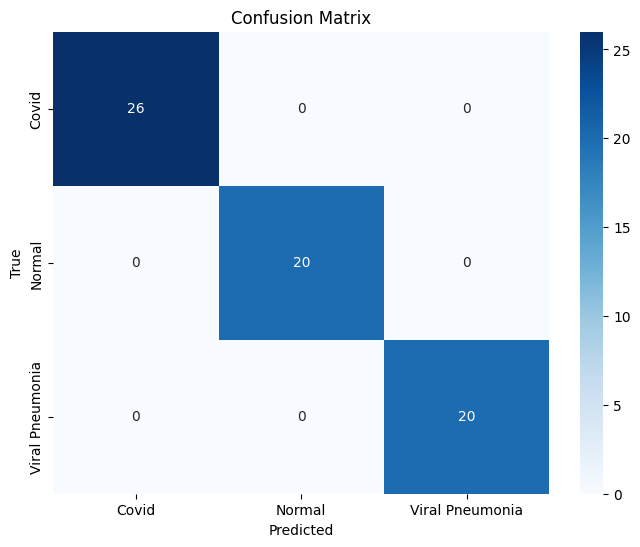

Classification Report:
                  precision    recall  f1-score   support

          Covid       1.00      1.00      1.00        26
         Normal       1.00      1.00      1.00        20
Viral Pneumonia       1.00      1.00      1.00        20

       accuracy                           1.00        66
      macro avg       1.00      1.00      1.00        66
   weighted avg       1.00      1.00      1.00        66



In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for the test set
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)  # Rescale pixel values

# Load the test data from the directories
test_data = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(500, 500),  # Adjust target size as needed
    batch_size=1,  # Set batch size to 1 to visualize individual predictions
    class_mode='categorical',
    shuffle=False  # Important to match predictions with true labels
)

# Get true labels
true_labels = test_data.classes

# Predict using your VGG16 model
predictions = model.predict(test_data)

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))

# Get class names (categories)
class_names = list(test_data.class_indices.keys())

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print("Classification Report:\n", report)


### .... Finished ....